In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

warnings.filterwarnings('ignore')

In [2]:
customer_features = pd.read_csv('customer_features.csv')

In [3]:
customer_features

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846,2
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220,3
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517,2
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987,0
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393,3
...,...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586,3
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172,0
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187,0
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826,0


**Check CustLocation Consistency**

In [5]:
customer_features['CustLocation'].unique()

array(['NEW DELHI', 'MUMBAI', 'CHAMPARAN', ..., 'JAWALI', 'HAILY HANDI',
       '13 GORAKHPUR'], dtype=object)

In [6]:
#check for leading or trailing white spaces
customer_features['CustLocation'].nunique()

7785

In [7]:
customer_features['CustLocation'].str.strip().nunique()

7784

In [8]:
#value count
customer_features['CustLocation'].value_counts().head(20)

CustLocation
MUMBAI         76861
BANGALORE      72838
DELHI          60335
GURGAON        60098
NEW DELHI      57638
CHENNAI        25035
NOIDA          23777
HYDERABAD      18302
PUNE           17889
KOLKATA        15402
THANE          15072
GHAZIABAD      12788
AHMEDABAD      10816
NAVI MUMBAI     9354
FARIDABAD       9323
CHANDIGARH      8040
JAIPUR          7710
LUCKNOW         5890
MOHALI          4683
SURAT           3747
Name: count, dtype: int64

In [9]:
#check for missing values
customer_features['CustLocation'].isna().sum()

0

In [10]:
#standardize CustLocation to remove leading or trailing whitespace
customer_features['CustLocation'] = customer_features['CustLocation'].str.strip().str.upper()

In [11]:
customer_features['CustLocation'].nunique()

7783

In [12]:
customer_features

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846,2
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220,3
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517,2
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987,0
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393,3
...,...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586,3
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172,0
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187,0
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826,0


**Distribution of customers across locations**

In [14]:
#count of customers per location and cluster
location_cluster_counts = customer_features.groupby(['CustLocation', 'Cluster']).size().unstack(fill_value=0)

In [15]:
location_cluster_counts

Cluster,0,1,2,3
CustLocation,,,,
(154) BHASKOLA FARIDABAD,3,2,3,3
(BENAKA MDTS) BANGALORE,11,1,4,3
(DT) HOSUR,3,2,3,3
(E) MUMBAI,9,5,9,20
(E) THANE SECTOR 3,0,0,0,1
...,...,...,...,...
ZIRKPUR,0,1,0,8
ZONE WHITEFIELD BANGALORE,1,6,1,19
ZUARINAGAR,2,0,0,2


In [16]:
#location cluster proportion
location_cluster_props = location_cluster_counts.div(location_cluster_counts.sum(axis=1), axis=0)

In [17]:
location_cluster_props

Cluster,0,1,2,3
CustLocation,,,,
(154) BHASKOLA FARIDABAD,0.272727,0.181818,0.272727,0.272727
(BENAKA MDTS) BANGALORE,0.578947,0.052632,0.210526,0.157895
(DT) HOSUR,0.272727,0.181818,0.272727,0.272727
(E) MUMBAI,0.209302,0.116279,0.209302,0.465116
(E) THANE SECTOR 3,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...
ZIRKPUR,0.000000,0.111111,0.000000,0.888889
ZONE WHITEFIELD BANGALORE,0.037037,0.222222,0.037037,0.703704
ZUARINAGAR,0.500000,0.000000,0.000000,0.500000


In [18]:
#only show locations with significant customer volume
major_locations = customer_features['CustLocation'].value_counts()[lambda x: x > 100].index
filtered_data = customer_features[customer_features['CustLocation'].isin(major_locations)]

In [19]:
major_locations

Index(['MUMBAI', 'BANGALORE', 'DELHI', 'GURGAON', 'NEW DELHI', 'CHENNAI',
       'NOIDA', 'HYDERABAD', 'PUNE', 'KOLKATA',
       ...
       'GOREGAON (W) MUMBAI', 'NEW MUMBAI', 'HOSPITAL MUMBAI', 'SUNDARGARH',
       'NANI DAMAN', 'MOOSAPET HYDERABAD', 'KARUR', 'MAINPURI',
       'WHITEFIELD BANGALORE', 'KURLA W MUMBAI'],
      dtype='object', name='CustLocation', length=476)

In [20]:
filtered_data

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846,2
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220,3
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517,2
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393,3
5,C1010028,F,DELHI,28,102,1,6.324359,6.324359,3
...,...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586,3
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172,0
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187,0
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826,0


**Key performance indicators per location per cluster**

In [22]:
#group by CustLocation and Cluster, then aggregate
location_cluster_kpis = customer_features.groupby(['CustLocation', 'Cluster']).agg(
    CustomerCount=('CustomerID', 'count'),
    AvgAge=('Age', 'mean'),
    AvgRecency=('Recency', 'mean'),
    AvgFrequency=('Frequency', 'mean'),
    AvgAvgMonetary=('AvgMonetary', 'mean'),
    AvgTotalMonetary=('TotalMonetary', 'mean')
).reset_index()

**Focus on locations with significant amount of customers (100+)**

In [24]:
#filter locations with at least 100 customers overall
location_counts = customer_features['CustLocation'].value_counts()
major_locations = location_counts[location_counts >= 100].index

In [25]:
#filter KPI dataframe
filtered_kpis = location_cluster_kpis[location_cluster_kpis['CustLocation'].isin(major_locations)]

In [26]:
#preview only major cities
filtered_kpis.sort_values(['CustLocation', 'Cluster']).head(10)

,CustLocation,Cluster,CustomerCount,AvgAge,AvgRecency,AvgFrequency,AvgAvgMonetary,AvgTotalMonetary
223,9A MALLESHWARAM BANGALORE,0,116,33.913793,95.715517,1.008621,3.966444,3.993727
224,9A MALLESHWARAM BANGALORE,1,12,34.000000,276.833333,1.000000,4.159591,4.159591
225,9A MALLESHWARAM BANGALORE,2,6,27.833333,58.666667,2.000000,5.136935,10.273870
226,9A MALLESHWARAM BANGALORE,3,10,34.000000,85.800000,1.000000,5.473203,5.473203
272,ABU DHABI,0,12,29.500000,102.833333,1.000000,4.576087,4.576087
273,ABU DHABI,1,12,33.833333,282.000000,1.000000,6.678198,6.678198
274,ABU DHABI,2,40,29.300000,84.750000,2.150000,6.485091,13.922659
275,ABU DHABI,3,58,31.758621,80.275862,1.000000,7.371485,7.371485
318,ADILABAD,0,188,24.978723,108.478723,1.010638,4.252052,4.281108
319,ADILABAD,1,62,27.000000,259.661290,1.016129,5.985183,6.049508


After filtering the kpis, I still had to reduce the dataframe to make the visualization appealing and actionable.
Therefore, I had to focus on the top 20 cities.

In [28]:
#identify the top 20 cities by total customer count
top_cities = (
    filtered_kpis.groupby('CustLocation')['CustomerCount']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

In [29]:
#filter the KPI dataframe to only include these top cities
top_kpis = filtered_kpis[filtered_kpis['CustLocation'].isin(top_cities)]

In [30]:
top_kpis

,CustLocation,Cluster,CustomerCount,AvgAge,AvgRecency,AvgFrequency,AvgAvgMonetary,AvgTotalMonetary
398,AHMEDABAD,0,2772,26.311328,100.722222,1.013709,4.678388,4.718400
399,AHMEDABAD,1,1620,28.675926,273.759259,1.004938,6.075451,6.098882
400,AHMEDABAD,2,2853,28.895198,88.218717,2.176306,6.040274,13.134750
401,AHMEDABAD,3,3571,30.546626,99.779614,1.000000,6.980602,6.980602
1650,BANGALORE,0,18444,26.075363,100.662058,1.015127,4.778920,4.826909
...,...,...,...,...,...,...,...,...
16075,SURAT,3,1316,30.834347,99.610942,1.000000,6.969050,6.969050
16434,THANE,0,4822,26.105558,102.773953,1.000622,4.664607,4.666436
16435,THANE,1,3172,29.348676,273.021438,1.000000,6.189432,6.189432
16436,THANE,2,278,28.928058,95.111511,2.136691,6.122232,13.067592


In [66]:
#save to excel
top_kpis.to_excel("top_kpis.xlsx", index=False)

**Customer distribution by cluster and city (Top 20 cities)**

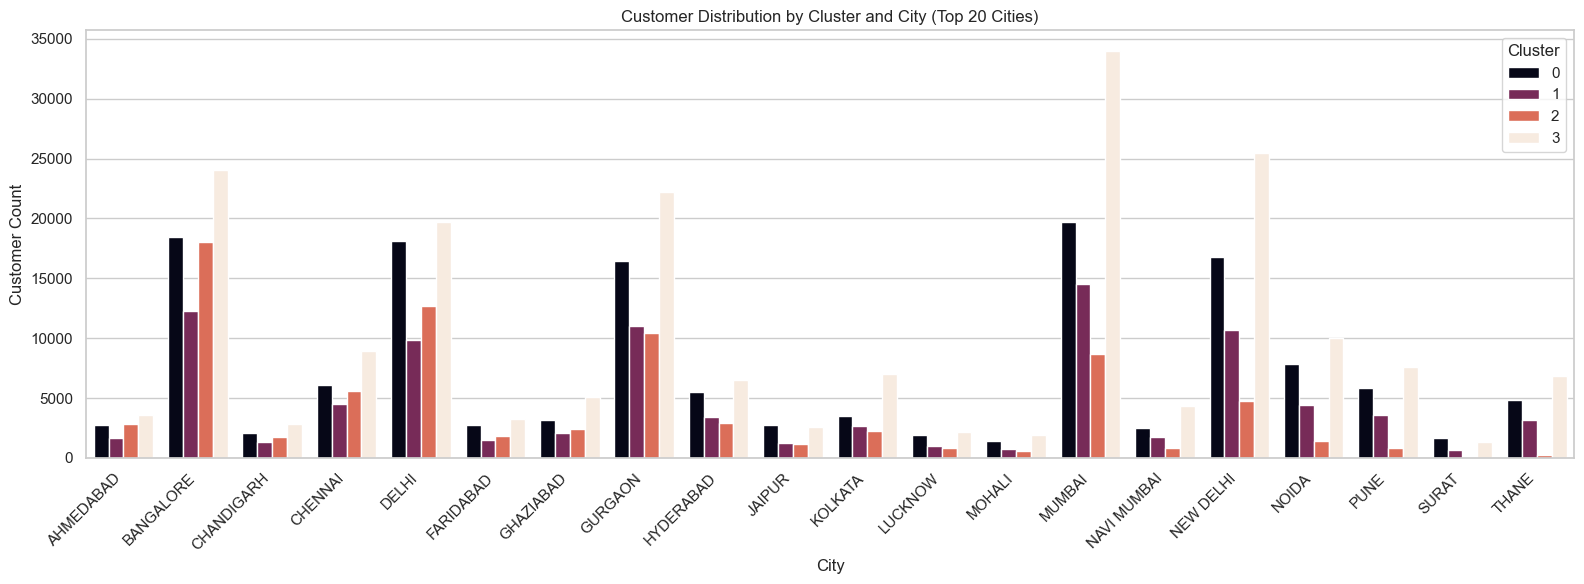

In [32]:
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top_kpis,
    x='CustLocation',
    y='CustomerCount',
    hue='Cluster',
    palette='rocket'
)
plt.title('Customer Distribution by Cluster and City (Top 20 Cities)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig('distribution_by_cluster_city.png', dpi=300, bbox_inches='tight')
plt.show()

**Average total spend by cluster per city**

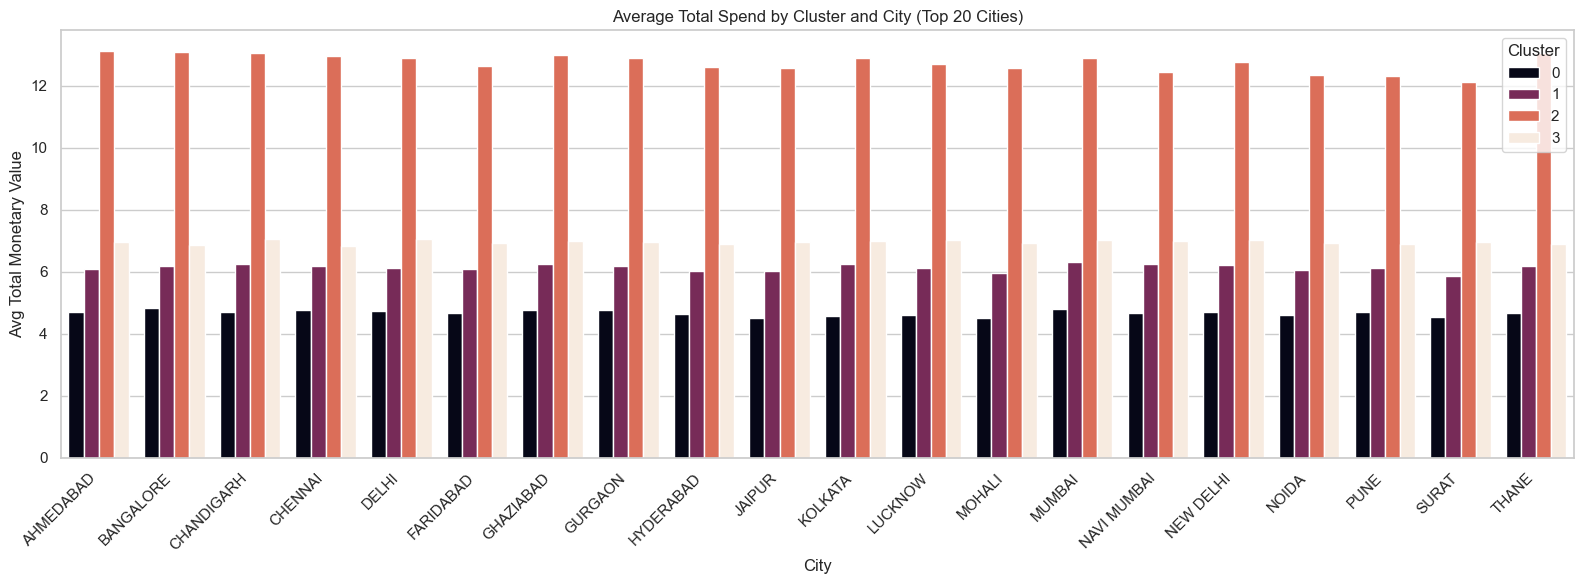

In [34]:
plt.figure(figsize=(16, 6))
sns.barplot(
    data=top_kpis,
    x='CustLocation',
    y='AvgTotalMonetary',
    hue='Cluster',
    palette='rocket'
)
plt.title('Average Total Spend by Cluster and City (Top 20 Cities)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Avg Total Monetary Value')
plt.tight_layout()
plt.savefig('avgspend_by_cluster_city.png', dpi=300, bbox_inches='tight')
plt.show()

**Heatmap of cluster distribution**

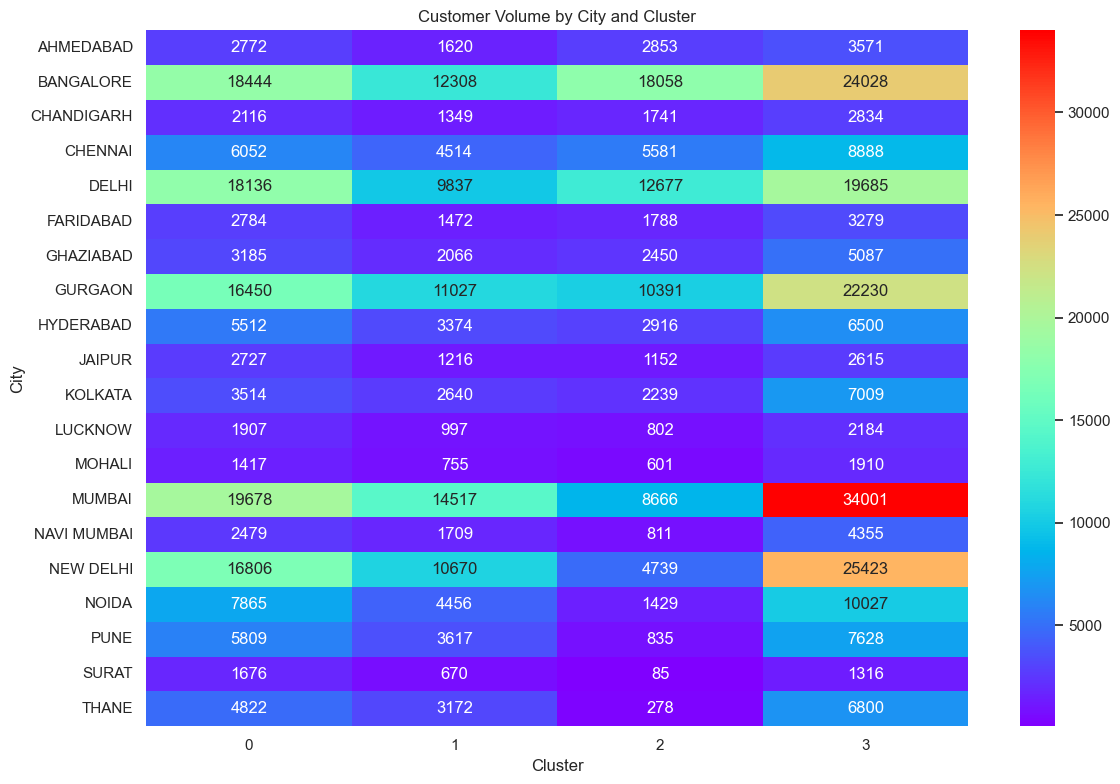

In [36]:
pivot = top_kpis.pivot_table(
    index='CustLocation',
    columns='Cluster',
    values='CustomerCount',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='rainbow')
plt.title('Customer Volume by City and Cluster')
plt.ylabel('City')
plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig('volume_by_cluster_city.png', dpi=300, bbox_inches='tight')
plt.show()